In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from numpy import expand_dims

import tensorflow as tf
from tensorflow.keras.applications import ResNet50

import skimage
from skimage import color

from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

### **Import Dataset**

Link Dataset : https://drive.google.com/drive/u/4/folders/1gxEloP2EN2OlMVjuDUp1jQWH8o6mr_sN

### **Dataset Overview**

In [ ]:
# Set the directory path to your Google Drive folder
main_path = '../Downloads/dataset-food-selected-cut-label'

# path each image folder
path_img = []

for root in os.listdir(main_path):
    temp_path = f'{main_path}/{root}'
    path_img.append(temp_path)

path_img

['../Downloads/dataset-food-selected-cut-label/asinan-jakarta',
 '../Downloads/dataset-food-selected-cut-label/ayam-goreng-lengkuas',
 '../Downloads/dataset-food-selected-cut-label/es-dawet',
 '../Downloads/dataset-food-selected-cut-label/gado-gado',
 '../Downloads/dataset-food-selected-cut-label/gulai-ikan-asin',
 '../Downloads/dataset-food-selected-cut-label/kolak',
 '../Downloads/dataset-food-selected-cut-label/lumpia-semarang',
 '../Downloads/dataset-food-selected-cut-label/mie-aceh',
 '../Downloads/dataset-food-selected-cut-label/rendang',
 '../Downloads/dataset-food-selected-cut-label/rujak-cingur',
 '../Downloads/dataset-food-selected-cut-label/sate-ayam-madura',
 '../Downloads/dataset-food-selected-cut-label/sate-meranggi',
 '../Downloads/dataset-food-selected-cut-label/serabi',
 '../Downloads/dataset-food-selected-cut-label/soto-ayam-lamongan',
 '../Downloads/dataset-food-selected-cut-label/soto-banjar']

In [ ]:
# dataframe for images
df = pd.DataFrame(columns=['images','label','path'])

In [ ]:
df

,images,label,path


In [ ]:
# list of file image in image path (os.listdir)
listdir_img = []
for path in path_img:
    listdir_img.append(os.listdir(path))

In [ ]:
listdir_img

[['asinan-jakarta 0.jpg',
  'asinan-jakarta 1.jpg',
  'asinan-jakarta 10.jpg',
  'asinan-jakarta 11.jpg',
  'asinan-jakarta 12.jpg',
  'asinan-jakarta 13.jpg',
  'asinan-jakarta 14.jpg',
  'asinan-jakarta 15.jpg',
  'asinan-jakarta 16.jpg',
  'asinan-jakarta 17.jpg',
  'asinan-jakarta 18.jpg',
  'asinan-jakarta 19.jpg',
  'asinan-jakarta 2.jpg',
  'asinan-jakarta 20.jpg',
  'asinan-jakarta 21.jpg',
  'asinan-jakarta 22.jpg',
  'asinan-jakarta 23.jpg',
  'asinan-jakarta 24.jpg',
  'asinan-jakarta 25.jpg',
  'asinan-jakarta 26.jpg',
  'asinan-jakarta 27.jpg',
  'asinan-jakarta 28.jpg',
  'asinan-jakarta 29.jpg',
  'asinan-jakarta 3.jpg',
  'asinan-jakarta 30.jpg',
  'asinan-jakarta 31.jpg',
  'asinan-jakarta 32.jpg',
  'asinan-jakarta 33.jpg',
  'asinan-jakarta 34.jpg',
  'asinan-jakarta 35.jpg',
  'asinan-jakarta 36.jpg',
  'asinan-jakarta 37.jpg',
  'asinan-jakarta 38.jpg',
  'asinan-jakarta 39.jpg',
  'asinan-jakarta 4.jpg',
  'asinan-jakarta 40.jpg',
  'asinan-jakarta 41.jpg',
  'asi

In [ ]:
# get image file
img_file = []
for i in range(len(listdir_img)):
    for j in range(len(listdir_img[i])):
        img_file.append(listdir_img[i][j])

In [ ]:
img_file

['asinan-jakarta 0.jpg',
 'asinan-jakarta 1.jpg',
 'asinan-jakarta 10.jpg',
 'asinan-jakarta 11.jpg',
 'asinan-jakarta 12.jpg',
 'asinan-jakarta 13.jpg',
 'asinan-jakarta 14.jpg',
 'asinan-jakarta 15.jpg',
 'asinan-jakarta 16.jpg',
 'asinan-jakarta 17.jpg',
 'asinan-jakarta 18.jpg',
 'asinan-jakarta 19.jpg',
 'asinan-jakarta 2.jpg',
 'asinan-jakarta 20.jpg',
 'asinan-jakarta 21.jpg',
 'asinan-jakarta 22.jpg',
 'asinan-jakarta 23.jpg',
 'asinan-jakarta 24.jpg',
 'asinan-jakarta 25.jpg',
 'asinan-jakarta 26.jpg',
 'asinan-jakarta 27.jpg',
 'asinan-jakarta 28.jpg',
 'asinan-jakarta 29.jpg',
 'asinan-jakarta 3.jpg',
 'asinan-jakarta 30.jpg',
 'asinan-jakarta 31.jpg',
 'asinan-jakarta 32.jpg',
 'asinan-jakarta 33.jpg',
 'asinan-jakarta 34.jpg',
 'asinan-jakarta 35.jpg',
 'asinan-jakarta 36.jpg',
 'asinan-jakarta 37.jpg',
 'asinan-jakarta 38.jpg',
 'asinan-jakarta 39.jpg',
 'asinan-jakarta 4.jpg',
 'asinan-jakarta 40.jpg',
 'asinan-jakarta 41.jpg',
 'asinan-jakarta 42.jpg',
 'asinan-jakarta 

In [ ]:
# add image file to column images in dataframe
df.loc[:, 'images'] = img_file

In [ ]:
df['images']

0        asinan-jakarta 0.jpg
1        asinan-jakarta 1.jpg
2       asinan-jakarta 10.jpg
3       asinan-jakarta 11.jpg
4       asinan-jakarta 12.jpg
                ...          
1495       soto-banjar 95.jpg
1496       soto-banjar 96.jpg
1497       soto-banjar 97.jpg
1498       soto-banjar 98.jpg
1499       soto-banjar 99.jpg
Name: images, Length: 1500, dtype: object

In [ ]:
label = []
paths = []
for image in df['images']:
    class_ = image.split(' ')[0]
    label.append(class_)
    paths.append(main_path+'/'+class_+'/'+image)

df['label'] = label
df['path'] = paths

In [ ]:
df['label'] = df['label'].str.replace('-', ' ')

In [ ]:
df.head

<bound method NDFrame.head of                      images           label  \
0      asinan-jakarta 0.jpg  asinan jakarta   
1      asinan-jakarta 1.jpg  asinan jakarta   
2     asinan-jakarta 10.jpg  asinan jakarta   
3     asinan-jakarta 11.jpg  asinan jakarta   
4     asinan-jakarta 12.jpg  asinan jakarta   
...                     ...             ...   
1495     soto-banjar 95.jpg     soto banjar   
1496     soto-banjar 96.jpg     soto banjar   
1497     soto-banjar 97.jpg     soto banjar   
1498     soto-banjar 98.jpg     soto banjar   
1499     soto-banjar 99.jpg     soto banjar   

                                                   path  
0     ../Downloads/dataset-food-selected-cut-label/a...  
1     ../Downloads/dataset-food-selected-cut-label/a...  
2     ../Downloads/dataset-food-selected-cut-label/a...  
3     ../Downloads/dataset-food-selected-cut-label/a...  
4     ../Downloads/dataset-food-selected-cut-label/a...  
...                                                 ...  

In [ ]:
df.isna().sum()

images    0
label     0
path      0
dtype: int64

In [ ]:
print('Food Count: ',len(df['label'].value_counts()))
df['label'].value_counts()

Food Count:  15


asinan jakarta          100
ayam goreng lengkuas    100
es dawet                100
gado gado               100
gulai ikan asin         100
kolak                   100
lumpia semarang         100
mie aceh                100
rendang                 100
rujak cingur            100
sate ayam madura        100
sate meranggi           100
serabi                  100
soto ayam lamongan      100
soto banjar             100
Name: label, dtype: int64

### **Change file name**

In [ ]:
# # input def
# # path_coba = '/content/drive/MyDrive/Food Image/dataset-food-selected/COBA-COBA' #dir label
# # img_file_coba = ['Bukti-report-supervisor.png','Bukti-report-supervisor2.png'] #label

# def rename_file_name (path_coba, img_file_coba):
#     # Specify the path and current name of the file --> '.../label/oldfile.jpg'
#     file_path = []
#     for i in img_file_coba:
#         file_path.append(os.path.join(path_coba, i))

#     # Specify the new name for the file --> 'label 1.jpg'
#     new_file_name = []
#     for i in range(len(img_file_coba)):
#         new_file_name_tmp = f'{os.path.basename(path_coba)} {str(i)}.jpg'
#         new_file_name.append(new_file_name_tmp)

#     # Construct the new file PATH with the NEW name file --> '.../label/label 1.jpg'
#     new_file_path = []
#     for i in new_file_name:
#         new_file_path.append(os.path.join(path_coba, i))

#     # Rename the file
#     for i in range(len(file_path)):
#         os.rename(file_path[i], new_file_path[i])

In [ ]:
# for i in range(len(path_img)):
#     rename_file_name(path_img[i], listdir_img[i])

### **Data Augmentation**

In [ ]:
def show_augmented_images(paths, datagen):
    plt.figure(figsize = (14,28))
    plt.suptitle('Augmented Images')

    midx = 0
    for path in paths:
        # open image from dataset
        img = Image.open(path)
        # resize image
        img = img.resize((227,227))
        samples = expand_dims(img, 0)
        it = datagen.flow(samples, batch_size=1)

        # show original images
        plt.subplot(10, 5, midx+1)
        plt.imshow(img)
        plt.axis('off')

        # show augmented images
        for idx, i in enumerate(range(4)):
            midx += 1
            plt.subplot(10,5, midx+1)

            batch = it.next()
            image = batch[0].astype('uint8')
            plt.imshow(image)
            plt.axis('off')
        midx += 1

    plt.show()

### **Splitting Data**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[['path', 'label']], df[['label']], test_size=0.2, random_state=32)

In [ ]:
X_train.head()

,path,label
8,../Downloads/dataset-food-selected-cut-label/a...,asinan jakarta
973,../Downloads/dataset-food-selected-cut-label/r...,rujak cingur
1068,../Downloads/dataset-food-selected-cut-label/s...,sate ayam madura
605,../Downloads/dataset-food-selected-cut-label/l...,lumpia semarang
931,../Downloads/dataset-food-selected-cut-label/r...,rujak cingur


In [ ]:
X_val.head()

,path,label
1153,../Downloads/dataset-food-selected-cut-label/s...,sate meranggi
1460,../Downloads/dataset-food-selected-cut-label/s...,soto banjar
1346,../Downloads/dataset-food-selected-cut-label/s...,soto ayam lamongan
43,../Downloads/dataset-food-selected-cut-label/a...,asinan jakarta
275,../Downloads/dataset-food-selected-cut-label/e...,es dawet


In [ ]:
y_train.head()

,label
8,asinan jakarta
973,rujak cingur
1068,sate ayam madura
605,lumpia semarang
931,rujak cingur


In [ ]:
y_val.head()

,label
1153,sate meranggi
1460,soto banjar
1346,soto ayam lamongan
43,asinan jakarta
275,es dawet


### **RESNET50**

In [ ]:
# Change image from RGB to BGR
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)


train_generator = datagen.flow_from_dataframe(
        X_train,
        x_col='path',
        y_col='label',
        target_size=(227, 227),
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
val_generator = datagen.flow_from_dataframe(
        X_val,
        x_col='path',
        y_col='label',
        target_size=(227, 227),
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

Found 1200 validated image filenames belonging to 15 classes.
Found 300 validated image filenames belonging to 15 classes.


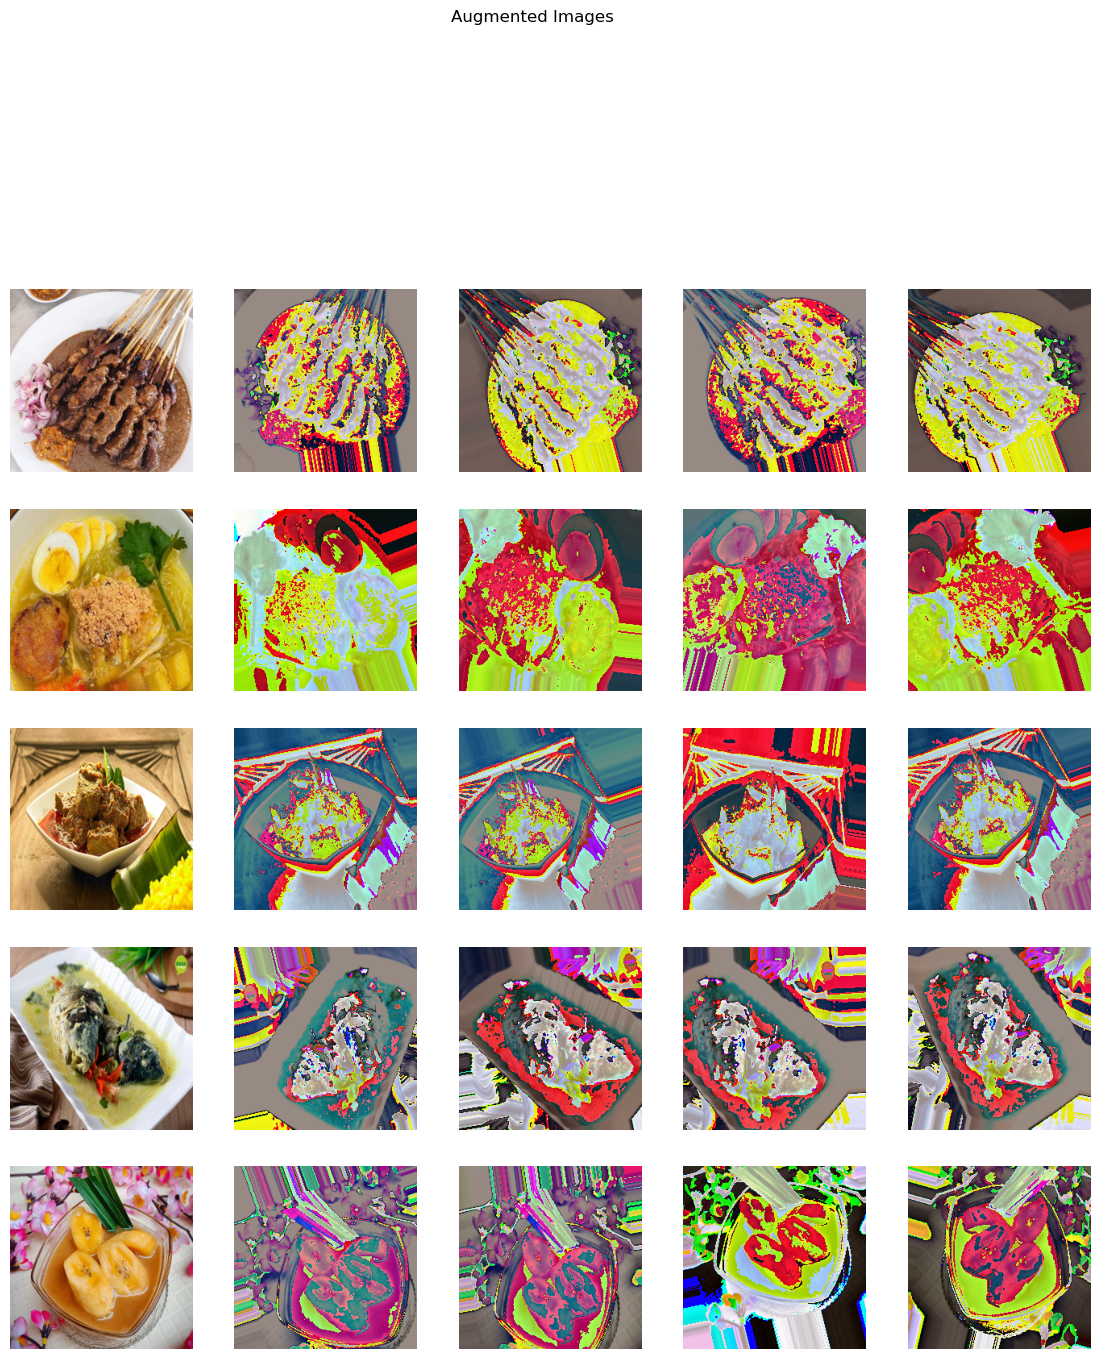

In [ ]:
# show 10 original images and its augmentation
show_augmented_images(np.random.choice(X_train['path'],5), datagen)

In [ ]:
resnet50 = ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')

for layer in resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(15, activation='softmax')(x)

model = Model(inputs = resnet50.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check accuracy
        if(logs.get('val_accuracy') >= 0.83):
            # Stop if threshold is met
            self.model.stop_training = True
            print("\nVal_accuracy is >= 0.83 so cancelling training!")

# Instantiate class
callbacks = myCallback()

In [ ]:
model_history = model.fit(
      train_generator,
      validation_data=val_generator,
      callbacks=[callbacks],
      epochs=100,
      verbose=2)

Epoch 1/100
38/38 - 511s - loss: 2.1260 - accuracy: 0.3617 - precision: 0.7820 - recall: 0.0867 - val_loss: 1.4173 - val_accuracy: 0.5767 - val_precision: 0.9535 - val_recall: 0.2733 - 511s/epoch - 13s/step
Epoch 2/100
38/38 - 468s - loss: 1.0729 - accuracy: 0.6908 - precision: 0.8996 - recall: 0.4258 - val_loss: 1.0877 - val_accuracy: 0.6633 - val_precision: 0.8627 - val_recall: 0.4400 - 468s/epoch - 12s/step
Epoch 3/100
38/38 - 519s - loss: 0.7949 - accuracy: 0.7717 - precision: 0.9150 - recall: 0.5833 - val_loss: 0.9334 - val_accuracy: 0.7000 - val_precision: 0.8541 - val_recall: 0.5267 - 519s/epoch - 14s/step
Epoch 4/100
38/38 - 426s - loss: 0.6369 - accuracy: 0.8325 - precision: 0.9450 - recall: 0.6733 - val_loss: 0.8281 - val_accuracy: 0.7300 - val_precision: 0.8780 - val_recall: 0.6000 - 426s/epoch - 11s/step
Epoch 5/100
38/38 - 490s - loss: 0.5024 - accuracy: 0.8617 - precision: 0.9395 - recall: 0.7500 - val_loss: 0.7557 - val_accuracy: 0.7433 - val_precision: 0.8664 - val_reca

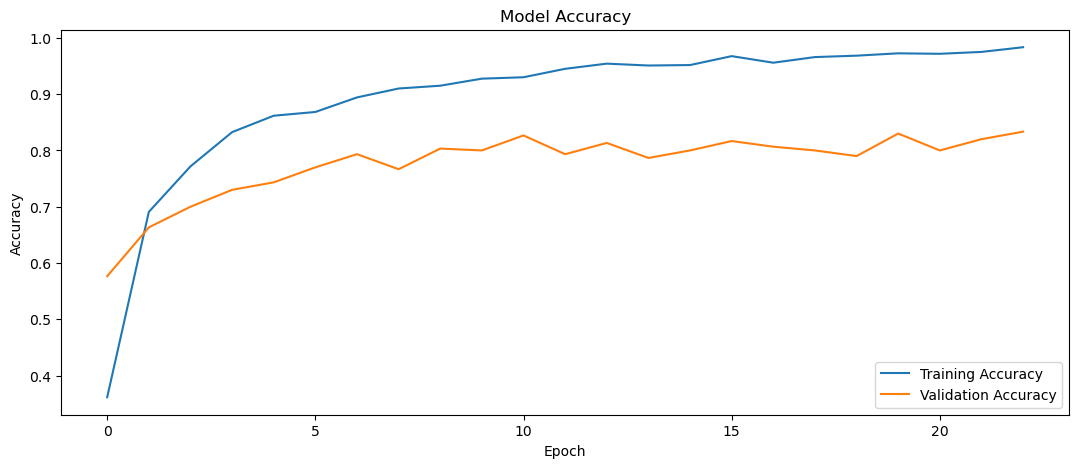

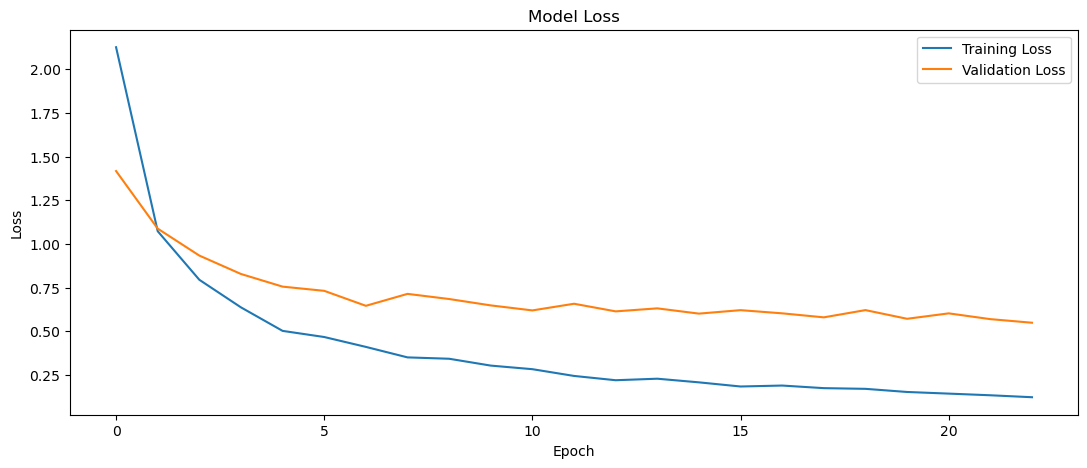

In [ ]:
# plotting training and validation accuracy
plt.figure(figsize=(13, 5))
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# plotting training and validation loss
plt.figure(figsize=(13, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# get sequence of label from dataset
class_indices = train_generator.class_indices

label_sequence = [class_name for class_name, index in sorted(class_indices.items(), key=lambda x: x[1])]
print("Label sequence:", label_sequence)

Label sequence: ['asinan jakarta', 'ayam goreng lengkuas', 'es dawet', 'gado gado', 'gulai ikan asin', 'kolak', 'lumpia semarang', 'mie aceh', 'rendang', 'rujak cingur', 'sate ayam madura', 'sate meranggi', 'serabi', 'soto ayam lamongan', 'soto banjar']


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import io
from IPython.display import display
import ipywidgets as widgets

upload_button = widgets.FileUpload()
display(upload_button)

def predict_image(b):
    for name, file_info in upload_button.value.items():
        # Load and preprocess the image
        img_data = file_info['content']
        img = load_img(io.BytesIO(img_data), target_size=(227, 227))
        img = img_to_array(img)
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)

        # Predict the image
        label = model.predict(img)
        print(label[0])
        print("=================")
        pred = np.argmax(label[0])
        print("Index ke-", pred)
        print("Probabilitasnya: ", label[0][pred])
        print(f'Image {name} is a {label_sequence[pred]}')

predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_image)
display(predict_button)


FileUpload(value={}, description='Upload')

Button(description='Predict', style=ButtonStyle())